In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from statsmodels.graphics.tsaplots import plot_acf
from arch import arch_model


In [23]:
sp_df = pd.read_csv('SP500.csv')

# Drop rows with value '.'
df = sp_df.drop(sp_df[sp_df['SP500']== '.'].index)

In [24]:
values = df['SP500'].astype(float)
returns = (100*(np.log(values.shift()) - np.log(values)))[1:]
returns

1       2.628894
2      -1.092319
3       0.320833
4      -0.652414
5      -1.260744
          ...   
1301   -0.198784
1302   -0.967533
1303    0.198655
1304   -0.423072
1305    0.897295
Name: SP500, Length: 1258, dtype: float64

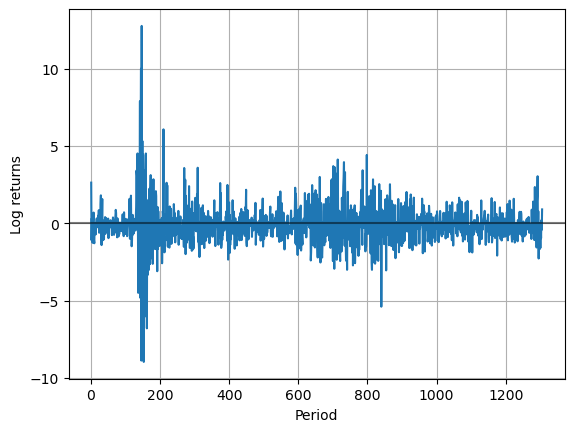

In [25]:
plt.plot(returns)

plt.axhline(0,0,1,color='black', alpha=0.5)

plt.ylabel('Log returns')
plt.xlabel('Period')
plt.grid(True)
plt.show()

Text(0, 0.5, 'Correlation Coefficient')

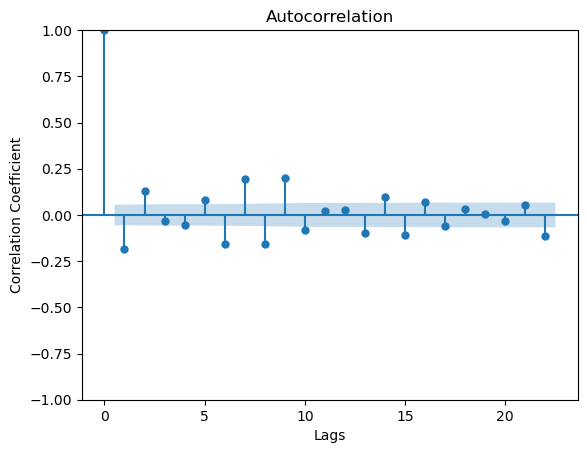

In [27]:
x = plot_acf(returns, lags=22)
plt.xlabel('Lags')
plt.ylabel('Correlation Coefficient')

Yes, there seems to be correlation with lag 1 and lag 2.

### b)

In [7]:
squared = returns**2

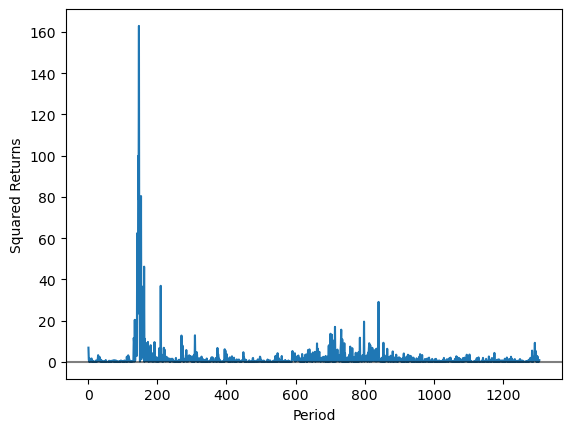

In [30]:
plt.plot(squared)
plt.xlabel('Period')
plt.ylabel('Squared Returns')
plt.axhline(0,0,1,color='black', alpha=0.5)

plt.show()

Text(0, 0.5, 'Correlation Coefficient')

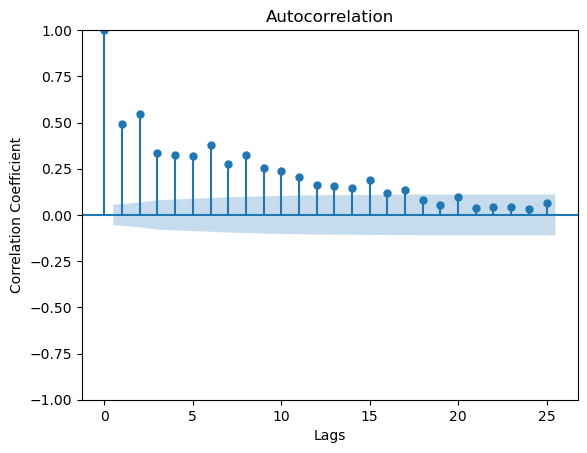

In [32]:
y = plot_acf(squared, lags=25)

plt.xlabel('Lags')
plt.ylabel('Correlation Coefficient')

Displays a much stronger sereial correlation, suggesting lags all the way through 15 has an effect.

### c)

Idea:

Create white noise. Train a GARCH model on it an show that the GARCH(1,1) model has the sum of alpha and beta less than 1

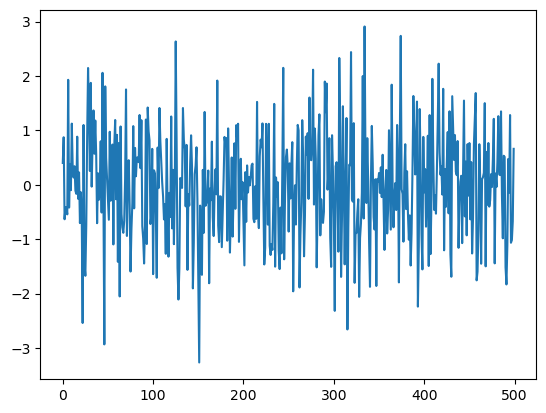

In [10]:
white_noise = np.random.normal(0,1, size=500)
plt.plot(white_noise)

In [11]:
model = arch_model(white_noise, q=1, p=1)
result = model.fit()

Iteration:      1,   Func. Count:      6,   Neg. LLF: 2335.978593918657
Iteration:      2,   Func. Count:     15,   Neg. LLF: 819.8038868188409
Iteration:      3,   Func. Count:     23,   Neg. LLF: 706.3043193119896
Iteration:      4,   Func. Count:     29,   Neg. LLF: 703.75104534661
Iteration:      5,   Func. Count:     34,   Neg. LLF: 706.1729514754921
Iteration:      6,   Func. Count:     40,   Neg. LLF: 711.7876114643223
Iteration:      7,   Func. Count:     48,   Neg. LLF: 703.7333919596412
Iteration:      8,   Func. Count:     53,   Neg. LLF: 703.7333228289081
Iteration:      9,   Func. Count:     58,   Neg. LLF: 703.7333138538922
Iteration:     10,   Func. Count:     62,   Neg. LLF: 703.7333138539617
Optimization terminated successfully    (Exit mode 0)
            Current function value: 703.7333138538922
            Iterations: 10
            Function evaluations: 62
            Gradient evaluations: 10


In [12]:
result.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                     Constant Mean - GARCH Model Results                      
==============================================================================
Dep. Variable:                      y   R-squared:                       0.000
Mean Model:             Constant Mean   Adj. R-squared:                  0.000
Vol Model:                      GARCH   Log-Likelihood:               -703.733
Distribution:                  Normal   AIC:                           1415.47
Method:            Maximum Likelihood   BIC:                           1432.33
                                        No. Observations:                  500
Date:                Tue, Sep 24 2024   Df Residuals:                      499
Time:                        22:08:56   Df Model:                            1
                                Mean Model                                
==========================================================================
                 coef    std err          t      P>|t|    95.0% Conf. Int.
--------------------------------------------------------------------------
mu            -0.0208  4.426e-02     -0.470      0.638 [ -0.108,6.593e-02]
                               Volatility Model                              
=============================================================================
                 coef    std err          t      P>|t|       95.0% Conf. Int.
-----------------------------------------------------------------------------
omega          0.0740  5.445e-02      1.359      0.174   [-3.270e-02,  0.181]
alpha[1]   3.1824e-03  2.100e-02      0.152      0.880 [-3.798e-02,4.435e-02]
beta[1]        0.9218  4.364e-02     21.126  4.604e-99      [  0.836,  1.007]
=============================================================================

Covariance estimator: robust
"""

In [13]:
errors = np.random.normal(0,1,500)
def r(variance, error):
    return np.sqrt(variance)*error

def variance(r_t_1, var_t_1):
    return 0.2 + 0.2*r_t_1**2 + 0.2 * var_t_1

In [36]:
var_0 = 1
r_0 = 0
variances = [var_0]
returns = [r_0]
for idx, error in enumerate(errors):
    r_prev, var_prev = returns[-1], variances[-1]
    var = variance(r_prev, var_prev)
    r_now = r(var, error)
    variances.append(var), returns.append(r_now)


    

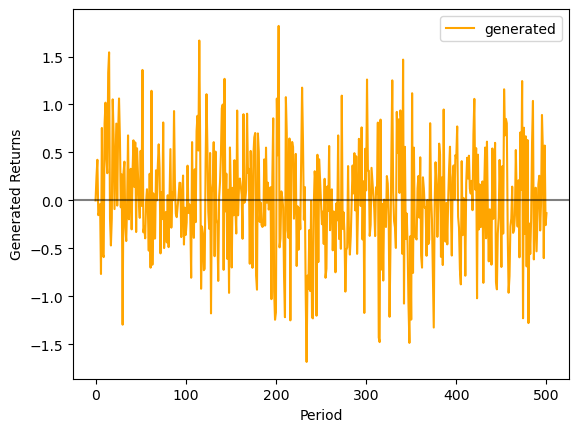

In [37]:
plt.plot(returns, color = 'orange', label = 'generated')

plt.xlabel('Period')
plt.ylabel('Generated Returns')
plt.axhline(0,0,1,color='black', alpha=0.5)

plt.legend()
plt.show()

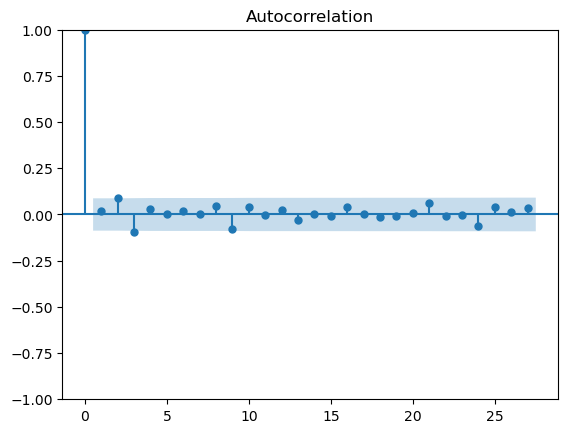

In [40]:
pd_r = pd.Series(returns)
c = plot_acf(pd_r)

In [17]:
np.mean(returns) # Very close to 0

-3.291978422018221e-05